# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('Data/ChelseaFCVietnam.csv')


In [52]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     140 non-null    int64  
 1   post_id                        140 non-null    int64  
 2   text                           140 non-null    object 
 3   post_text                      140 non-null    object 
 4   shared_text                    6 non-null      object 
 5   original_text                  0 non-null      float64
 6   time                           140 non-null    object 
 7   timestamp                      140 non-null    int64  
 8   image                          103 non-null    object 
 9   image_lowquality               140 non-null    object 
 10  images                         140 non-null    object 
 11  images_description             140 non-null    object 
 12  images_lowquality              140 non-null    obj

## Tinh so luong bai co tu khoa nhat dinh

In [73]:
str_values = 'Chelsea'

In [80]:
raw_df_chelsea = raw_df
raw_df_chelsea[str_values] = raw_df.post_text.str.contains(str)

In [81]:
raw_df_chelsea

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,Chelsea
0,0,648244647506950,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,NaN,NaN,2023-11-18 19:25:39,1700310339,NaN,https://scontent.fhan5-11.fna.fbcdn.net/v/t15....,...,"{'thích': 298, 'yêu thích': 13, 'haha': 128, '...",440,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:37:14.931,False
1,1,648163164181765,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,NaN,NaN,2023-11-18 15:53:21,1700297601,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,...,"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư...",766,NaN,113896562033783,NaN,6.481631e+14,['648163147515100'],False,2023-11-18 20:37:18.360,False
2,2,648154404182641,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,NaN,NaN,2023-11-18 15:30:05,1700296205,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,...,"{'thích': 17, 'yêu thích': 1}",18,NaN,113896562033783,NaN,6.481544e+14,['648154380849310'],False,2023-11-18 20:37:22.500,True
3,3,648124860852262,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,NaN,NaN,2023-11-18 14:00:57,1700290857,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,...,"{'thích': 35, 'yêu thích': 4}",39,NaN,113896562033783,NaN,6.481248e+14,['648124844185597'],False,2023-11-18 20:37:26.558,True
4,4,648010860863662,"""A dream comes true""\n\nChúc mừng Cole Palmer ...","""A dream comes true""\n\nChúc mừng Cole Palmer ...",NaN,NaN,2023-11-18 08:48:20,1700272100,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,...,"{'thích': 844, 'yêu thích': 59, 'thương thương...",906,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:37:38.555,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,640418871622861,Chúc mừng sinh nhật lần thứ 50 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 50 của cựu cầu thủ...,NaN,NaN,2023-11-03 14:00:14,1698994814,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,{'like': 52},52,NaN,113896562033783,NaN,6.404189e+14,['640418851622863'],False,2023-11-18 20:56:54.076,True
136,136,640109248320490,"Chia sẻ với The Guardian, cụ Silva bật mí bí q...","Chia sẻ với The Guardian, cụ Silva bật mí bí q...",NaN,NaN,2023-11-02 22:49:46,1698940186,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,...,NaN,0,NaN,113896562033783,NaN,6.401084e+14,['640108441653904'],False,NaN,False
137,137,640088254989256,CHÍNH THỨC ✅\n\nTrợ lý Jesus Perez đã bị FA ph...,CHÍNH THỨC ✅\n\nTrợ lý Jesus Perez đã bị FA ph...,NaN,NaN,2023-11-02 22:06:03,1698937563,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,NaN,0,NaN,113896562033783,NaN,6.400872e+14,['640087181656030'],False,NaN,False
138,138,639908348340580,Enzo Fernandez trong trận đấu với Blackburn rạ...,Enzo Fernandez trong trận đấu với Blackburn rạ...,NaN,NaN,2023-11-02 14:09:25,1698908965,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,...,NaN,0,NaN,113896562033783,NaN,NaN,[],False,NaN,False


In [76]:
grouped_Chelsea = raw_df.groupby(by=raw_df[str]).count()['post_id']

Text(0.5, 1.0, "Percentage of posts containing the keyword 'Chelsea'")

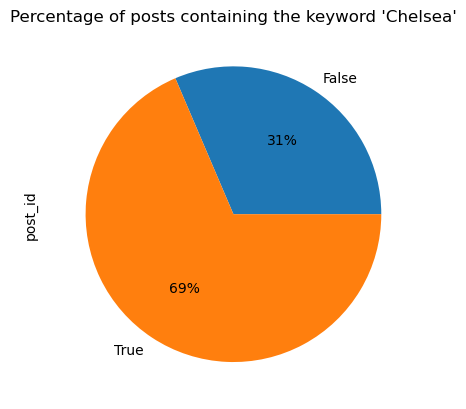

In [77]:
grouped_Chelsea.plot(kind="pie", autopct='%1.0f%%')
plt.title("Percentage of posts containing the keyword 'Chelsea'")

Qua đây ta thấy được trong tổng số bài của Fanpage mà ta crawl được thì số lượng post chứa từ khóa "Chelsea" chiếm tới 69% , điều này chứng tỏ rằng FanPage đưa ra những chủ đề liên quan tới tên FanPage là "Official Supporters Club Of Chelsea In Vietnam", Điều này đảm bảo rằng khi chúng ta theo dõi FanPage thì sẽ tìm được đúng nội dung liên quan đến đội bóng Chelsea thay vì tham gia vào những Fanpage lập ra chỉ để bán hàng, quảng cáo ...

# ...

In [59]:
first_row = raw_df.iloc[4]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [60]:
reactions

{'thích': 844,
 'yêu thích': 59,
 'thương thương': 3,
 'shares': 1,
 'comments': 12}

Add

In [61]:
raw_df[['post_id', 'reactions']]

,post_id,reactions
0,648244647506950,"{'thích': 298, 'yêu thích': 13, 'haha': 128, '..."
1,648163164181765,"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư..."
2,648154404182641,"{'thích': 17, 'yêu thích': 1}"
3,648124860852262,"{'thích': 35, 'yêu thích': 4}"
4,648010860863662,"{'thích': 844, 'yêu thích': 59, 'thương thương..."
...,...,...
135,640418871622861,{'like': 52}
136,640109248320490,NaN
137,640088254989256,NaN
138,639908348340580,NaN


In [3]:
raw_df2 = raw_df[['time', 'timestamp', 'reaction_count']]
raw_df2

,time,timestamp,reaction_count
0,2023-11-18 19:25:39,1700310339,440
1,2023-11-18 15:53:21,1700297601,766
2,2023-11-18 15:30:05,1700296205,18
3,2023-11-18 14:00:57,1700290857,39
4,2023-11-18 08:48:20,1700272100,906
...,...,...,...
135,2023-11-03 14:00:14,1698994814,52
136,2023-11-02 22:49:46,1698940186,0
137,2023-11-02 22:06:03,1698937563,0
138,2023-11-02 14:09:25,1698908965,0


In [4]:
time = raw_df2['time'].to_list()
dates = raw_df2['timestamp'].to_list()
y = raw_df2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates), len(y))
print(dates)
print(y)

140 140
[1698885509, 1698908965, 1698937563, 1698940186, 1698994814, 1699002585, 1699013084, 1699016480, 1699022394, 1699063692, 1699074944, 1699081260, 1699083037, 1699100287, 1699102537, 1699102694, 1699106000, 1699106304, 1699106558, 1699106866, 1699108038, 1699167625, 1699174408, 1699237509, 1699247268, 1699254045, 1699255826, 1699257627, 1699276351, 1699297377, 1699298370, 1699301690, 1699301860, 1699302186, 1699302885, 1699303003, 1699303724, 1699304487, 1699305593, 1699305959, 1699306206, 1699307182, 1699307419, 1699308120, 1699308203, 1699308232, 1699308296, 1699308455, 1699308803, 1699310638, 1699314393, 1699318514, 1699343095, 1699351138, 1699352079, 1699365761, 1699408531, 1699412622, 1699427427, 1699428605, 1699432155, 1699456819, 1699464685, 1699522810, 1699531085, 1699534804, 1699538852, 1699599645, 1699601423, 1699625980, 1699634479, 1699679745, 1699682413, 1699686042, 1699687804, 1699689650, 1699694871, 1699702518, 1699772227, 1699774238, 1699776014, 1699779634, 1699790

In [5]:
raw_df2['time'] = pd.to_datetime(raw_df2['time'])

/tmp/ipykernel_20652/2205682772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time'] = pd.to_datetime(raw_df2['time'])


## Tong hop so bai dang trong mot ngay


In [6]:
raw_df2['time_not_hour'] = pd.to_datetime(raw_df2['time']).dt.date

/tmp/ipykernel_20652/851190058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time_not_hour'] = pd.to_datetime(raw_df2['time']).dt.date


In [7]:
raw_df2

,time,timestamp,reaction_count,time_not_hour
0,2023-11-18 19:25:39,1700310339,440,2023-11-18
1,2023-11-18 15:53:21,1700297601,766,2023-11-18
2,2023-11-18 15:30:05,1700296205,18,2023-11-18
3,2023-11-18 14:00:57,1700290857,39,2023-11-18
4,2023-11-18 08:48:20,1700272100,906,2023-11-18
...,...,...,...,...
135,2023-11-03 14:00:14,1698994814,52,2023-11-03
136,2023-11-02 22:49:46,1698940186,0,2023-11-02
137,2023-11-02 22:06:03,1698937563,0,2023-11-02
138,2023-11-02 14:09:25,1698908965,0,2023-11-02


In [89]:
raw_df["time_not_hour"] = raw_df2["time_not_hour"]

In [90]:
filtered_df = raw_df[raw_df["time_not_hour"] == pd.to_datetime('2023-11-13').date()]
filtered_df

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,Chelsea,time_not_hour
26,26,645741307757284,Bàn thắng của cụ Silva từ góc quay trên khán đ...,Bàn thắng của cụ Silva từ góc quay trên khán đ...,NaN,NaN,2023-11-13 23:37:54,1699893474,NaN,https://scontent.fhan5-6.fna.fbcdn.net/v/t15.5...,...,1849,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:43:32.232,True,2023-11-13
27,27,645682574429824,PV SAU TRẬN GẶP MAN CITY TẠI VÒNG 12 NGOẠI HẠN...,PV SAU TRẬN GẶP MAN CITY TẠI VÒNG 12 NGOẠI HẠN...,NaN,NaN,2023-11-13 21:28:25,1699885705,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,...,401,NaN,113896562033783,NaN,6.456825e+14,['645682544429827'],False,2023-11-18 20:43:43.713,True,2023-11-13
28,28,645606871104061,"Trong ngày được trở về đội trẻ, ""tổng thống"" D...","Trong ngày được trở về đội trẻ, ""tổng thống"" D...",NaN,NaN,2023-11-13 18:34:39,1699875279,NaN,https://scontent.fhan5-11.fna.fbcdn.net/v/t15....,...,296,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:43:50.540,True,2023-11-13
29,29,645543701110378,Nhà báo David Ornstein xác nhận:\n\nVới phong ...,Nhà báo David Ornstein xác nhận:\n\nVới phong ...,NaN,NaN,2023-11-13 15:41:11,1699864871,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,...,2935,NaN,113896562033783,NaN,6.455436e+14,['645543557777059'],False,2023-11-18 20:43:59.004,False,2023-11-13
30,30,645532674444814,Chúc mừng sinh nhật lần thứ 32 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 32 của cựu cầu thủ...,NaN,NaN,2023-11-13 15:06:58,1699862818,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,49,NaN,113896562033783,NaN,6.455326e+14,['645532641111484'],False,2023-11-18 20:44:05.627,True,2023-11-13
31,31,645521177779297,Chúc mừng sinh nhật lần thứ 62 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 62 của cựu cầu thủ...,NaN,NaN,2023-11-13 14:30:13,1699860613,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,...,37,NaN,113896562033783,NaN,6.455212e+14,['645521157779299'],False,2023-11-18 20:44:09.561,True,2023-11-13
32,32,645511781113570,Chúc mừng sinh nhật lần thứ 79 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 79 của cựu cầu thủ...,NaN,NaN,2023-11-13 14:00:25,1699858825,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,45,NaN,113896562033783,NaN,6.455118e+14,['645511767780238'],False,2023-11-18 20:44:13.339,True,2023-11-13
33,33,645457704452311,Cole Palmer lạnh lùng ghi bàn ấn định tỷ số 4-...,Cole Palmer lạnh lùng ghi bàn ấn định tỷ số 4-...,NaN,NaN,2023-11-13 11:22:58,1699849378,NaN,https://scontent.fhan5-6.fna.fbcdn.net/v/t15.5...,...,2097,"[{'name': 'FAN CAM', 'link': '/watch/113896562...",113896562033783,NaN,NaN,[],False,2023-11-18 20:44:19.001,True,2023-11-13
34,34,645410341123714,"6 pha cứu thua xuất sắc, trong đó 5 pha là từ ...","6 pha cứu thua xuất sắc, trong đó 5 pha là từ ...",NaN,NaN,2023-11-13 09:07:51,1699841271,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,3354,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:44:28.787,False,2023-11-13
35,35,645371961127552,Thêm 1 danh hiệu “Cầu thủ xuất sắc nhất trận đ...,Thêm 1 danh hiệu “Cầu thủ xuất sắc nhất trận đ...,NaN,NaN,2023-11-13 07:14:57,1699834497,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,4637,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:44:44.607,False,2023-11-13


In [8]:
grouped1 = raw_df2.groupby('time_not_hour').size().reset_index(name='Counts')

In [70]:
grouped1

,time_not_hour,Counts
0,2023-11-02,4
1,2023-11-03,5
2,2023-11-04,12
3,2023-11-05,2
4,2023-11-06,6
5,2023-11-07,27
6,2023-11-08,6
7,2023-11-09,5
8,2023-11-10,4
9,2023-11-11,7


In [71]:
mean_post_each_day = grouped1["Counts"].mean()

In [9]:
grouped1['time_not_hour'] = grouped1['time_not_hour'].astype(str)

In [10]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

Text(0.5, 1.0, 'Number of posts per day on fanpage')

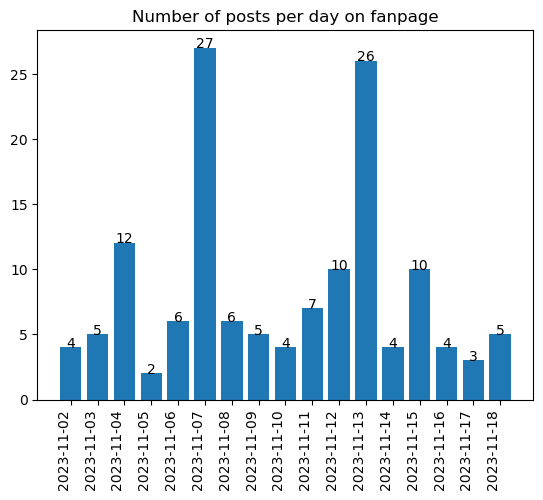

In [11]:
plt.bar(grouped1['time_not_hour'], grouped1['Counts'])
plt.xticks(np.arange(len(grouped1)),rotation=90, ha='right')
addlabels(grouped1['time_not_hour'], grouped1['Counts'])
plt.title("Number of posts per day on fanpage")

Ta thấy được số lượng bài đăng mỗi ngày của fanpage là không đồng đều, số bài đăng nhiều nhất trong một ngày là 27, cụ thể là vào ngày 07-11-2023 ,và là 26 vào ngày 13-11-2023, số bài đăng ít nhất trong một ngày là 2 vào ngày 05-11-2023 chênh lệnh khá nhiều so với số bài đăng trung bình trên mỗi ngày của Fanpage. Vậy tại sao lại có sự chênh lệch này? chúng ta sẽ thử tìm hiều về các sự kiện trong ngày 07-11-2023 và ngày 13-11-2023 liên quan đến đội bóng Chelsea

In [41]:
def hr_func(ts):
    return ts.hour

raw_df2['time_hour'] = raw_df2['time'].apply(hr_func)

/tmp/ipykernel_6095/3661188172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time_hour'] = raw_df2['time'].apply(hr_func)


In [43]:
raw_df2

,time,timestamp,reaction_count,time_hour
0,2023-11-18 19:25:39,1700310339,440,19
1,2023-11-18 15:53:21,1700297601,766,15
2,2023-11-18 15:30:05,1700296205,18,15
3,2023-11-18 14:00:57,1700290857,39,14
4,2023-11-18 08:48:20,1700272100,906,8
...,...,...,...,...
135,2023-11-03 14:00:14,1698994814,52,14
136,2023-11-02 22:49:46,1698940186,0,22
137,2023-11-02 22:06:03,1698937563,0,22
138,2023-11-02 14:09:25,1698908965,0,14


In [52]:
grouped = raw_df2.groupby('time_hour').size().reset_index(name = 'Counts')


In [53]:
grouped

,time_hour,Counts
0,0,8
1,1,7
2,2,4
3,3,6
4,4,6
5,5,7
6,6,4
7,7,4
8,8,5
9,9,4


In [59]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

Text(0, 0.5, 'The number of posts')

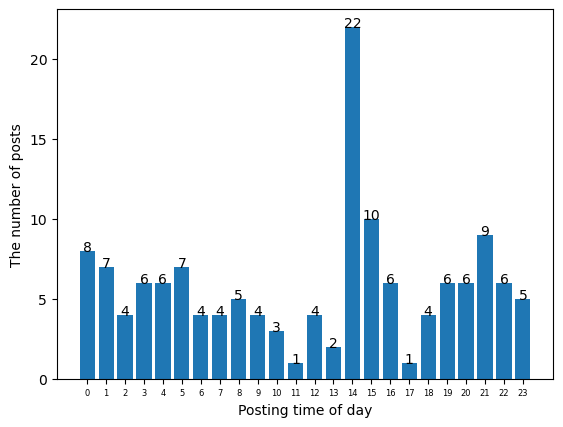

In [65]:
plt.bar(grouped['time_hour'], grouped['Counts'])
addlabels(grouped['time_hour'], grouped['Counts'])
plt.xticks(np.arange(len(grouped['time_hour'])))
plt.xlabel("Posting time of day")
plt.ylabel("The number of posts")


## Hieu suat tuong tac

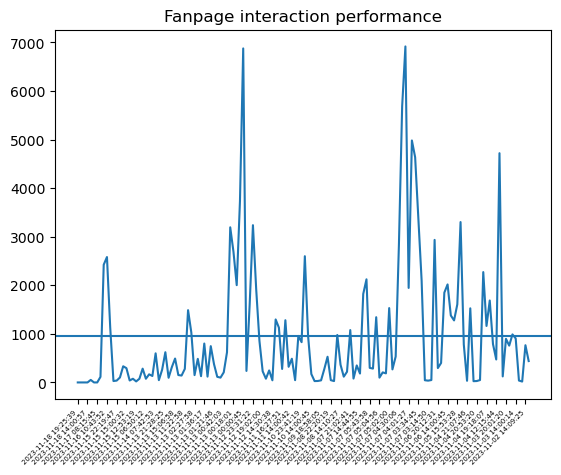

In [8]:
#Bieu do the hien hieu suat tuong tacbcua cac bai dang theo thoi gian tu xa ngay hien tai den hien tai
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=5) # thay doi font chu cua cac nhan truc x
plt.plot(time, y)
plt.axhline(y=np.nanmean(y))
plt.xticks(np.arange(0, len(time) + 1,3))
plt.xticks(rotation=45, ha='right')
plt.title("Fanpage interaction performance")
plt.show()


In [12]:
# cho nay phan tich cac ngay co luot reaction cao

## Phan tich tung loai luot react theo ngay

In [10]:
raw_df1 = raw_df[:133] # Do du lieu bi loi 7 gia tri cuoi nen chi lay mot phan

In [11]:
raw_df1

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,0,648244647506950,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,NaN,NaN,2023-11-18 19:25:39,1700310339,NaN,https://scontent.fhan5-11.fna.fbcdn.net/v/t15....,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 298, 'yêu thích': 13, 'haha': 128, '...",440,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:37:14.931
1,1,648163164181765,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,NaN,NaN,2023-11-18 15:53:21,1700297601,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư...",766,NaN,113896562033783,NaN,6.481631e+14,['648163147515100'],False,2023-11-18 20:37:18.360
2,2,648154404182641,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,NaN,NaN,2023-11-18 15:30:05,1700296205,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 17, 'yêu thích': 1}",18,NaN,113896562033783,NaN,6.481544e+14,['648154380849310'],False,2023-11-18 20:37:22.500
3,3,648124860852262,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,NaN,NaN,2023-11-18 14:00:57,1700290857,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 35, 'yêu thích': 4}",39,NaN,113896562033783,NaN,6.481248e+14,['648124844185597'],False,2023-11-18 20:37:26.558
4,4,648010860863662,"""A dream comes true""\n\nChúc mừng Cole Palmer ...","""A dream comes true""\n\nChúc mừng Cole Palmer ...",NaN,NaN,2023-11-18 08:48:20,1700272100,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 844, 'yêu thích': 59, 'thương thương...",906,NaN,113896562033783,NaN,NaN,[],False,2023-11-18 20:37:38.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,640955241569224,Chúc mừng sinh nhật lần thứ 70 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 70 của cựu cầu thủ...,NaN,NaN,2023-11-04 14:01:00,1699081260,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,...,https://www.facebook.com/ChelseaFCVietnam/post...,{'thích': 29},29,NaN,113896562033783,NaN,6.409552e+14,['640955211569227'],False,2023-11-18 20:56:14.576
129,129,640924171572331,Với 89% lượt bình chọn từ các cổ động viên trê...,Với 89% lượt bình chọn từ các cổ động viên trê...,NaN,NaN,2023-11-04 12:15:44,1699074944,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 1000, 'yêu thích': 112, 'haha': 15, ...",1135,NaN,113896562033783,NaN,6.409242e+14,['640924151572333'],False,2023-11-18 20:56:18.760
130,130,640859454912136,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,NaN,NaN,2023-11-04 09:08:12,1699063692,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ChelseaFCVietnam/post...,"{'thích': 2121, 'yêu thích': 400, 'haha': 38, ...",2582,NaN,113896562033783,NaN,6.408587e+14,['640858718245543'],False,2023-11-18 20:56:24.561
131,131,640602134937868,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,NaN,NaN,2023-11-03 21:39:54,1699022394,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://

In [12]:
raw_df1['reactions'] = raw_df1['reactions'].apply(lambda x : dict(eval(x)))
reactions = raw_df1['reactions'].apply(pd.Series)


/tmp/ipykernel_2792/2526294812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df1['reactions'] = raw_df1['reactions'].apply(lambda x : dict(eval(x)))


In [13]:
#Gop cac cot lai vao dataFrame
raw_df_with_reactions = pd.concat([raw_df1, reactions], axis = 1).drop('reactions', axis = 1)
raw_reactions = raw_df_with_reactions[['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments', 'reaction_count']]
raw_reactions.fillna(0, inplace = True)
raw_reactions

/tmp/ipykernel_2792/3890907121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_reactions.fillna(0, inplace = True)


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,298.0,13.0,128.0,1.0,0.0,0.0,0.0,0,5,440
1,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,676.0,83.0,0.0,1.0,0.0,0.0,6.0,6,9,766
2,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,18
3,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,35.0,4.0,0.0,0.0,0.0,0.0,0.0,0,2,39
4,"""A dream comes true""\n\nChúc mừng Cole Palmer ...",844.0,59.0,0.0,0.0,0.0,0.0,3.0,1,12,906
...,...,...,...,...,...,...,...,...,...,...,...
128,Chúc mừng sinh nhật lần thứ 70 của cựu cầu thủ...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29
129,Với 89% lượt bình chọn từ các cổ động viên trê...,1000.0,112.0,15.0,0.0,0.0,0.0,8.0,0,15,1135
130,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,2121.0,400.0,38.0,2.0,0.0,0.0,21.0,2,56,2582
131,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,1820.0,44.0,552.0,3.0,0.0,0.0,5.0,4,130,2424


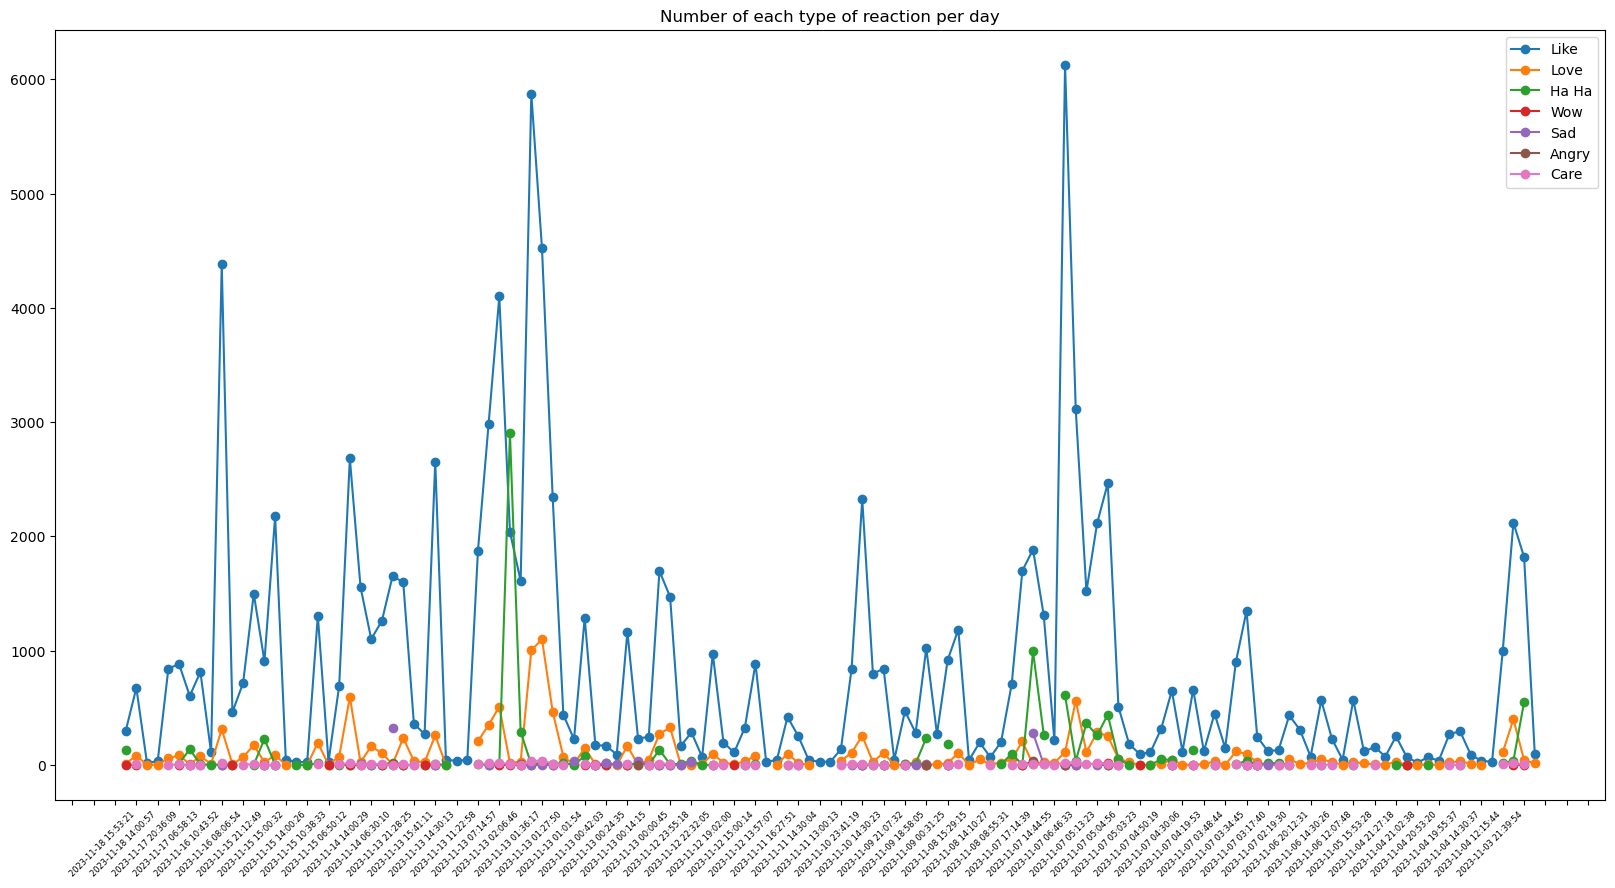

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right') # xoay cac gia tri o truc x di 45 do
from matplotlib.dates import DayLocator
matplotlib.rc('xtick', labelsize=6) # Chinh font chu cac gia tri o truc x
ax.xaxis.set_major_locator(DayLocator(interval=2))
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['thích'], label = 'Like', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['yêu thích'], label = 'Love', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['haha'], label = 'Ha Ha', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['wow'], label = 'Wow', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['buồn'], label = 'Sad', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['phẫn nộ'], label = 'Angry', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['thương thương'], label = 'Care', marker = 'o')
plt.title("Number of each type of reaction per day")
plt.legend()
from matplotlib.dates import DateFormatter
#ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [26]:

# O day ta danh gia xu huong tha reaction cua nguoi dung, xem thu tai mot so ngay co so luot reaction cao co dung ko

In [19]:
raw_df_with_reactions['time'].max()

'2023-11-18 19:25:39'

In [20]:
#Hien thi su tuong quan giua cac cot Like, Love, Ha Ha, Wow, Sad, Angry, Care voi cot Shares
raw_df_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].corrwith(raw_df_with_reactions['shares'])

thích            0.425734
yêu thích        0.526346
haha             0.420649
wow              0.233612
buồn            -0.021246
phẫn nộ          0.515400
thương thương    0.570967
dtype: float64

In [16]:
reactions_full = raw_df_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments', "reaction_count"]]
reactions_full.keys()

Index(['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương',
       'shares', 'comments', 'reaction_count'],
      dtype='object')

## Danh gia do tuong quan giua cac thanh phan cua reactions

In [17]:
corr = reactions_full.corr()
corr

,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
thích,1.000000,0.790508,0.196744,0.190391,-0.005201,0.116955,0.869625,0.425734,0.634231,0.981705
yêu thích,0.790508,1.000000,-0.097770,0.038935,-0.180740,-0.174462,0.916035,0.526346,0.600037,0.770306
haha,0.196744,-0.097770,1.000000,0.267811,0.142211,0.797839,0.080564,0.420649,0.380761,0.385674
wow,0.190391,0.038935,0.267811,1.000000,0.683848,0.798844,0.057445,0.233612,0.687727,0.274421
buồn,-0.005201,-0.180740,0.142211,0.683848,1.000000,0.577761,-0.163254,-0.021246,0.187001,0.049747
phẫn nộ,0.116955,-0.174462,0.797839,0.798844,0.577761,1.000000,0.018741,0.515400,0.544866,0.268567
thương thương,0.869625,0.916035,0.080564,0.057445,-0.163254,0.018741,1.000000,0.570967,0.616735,0.868733
shares,0.425734,0.526346,0.420649,0.233612,-0.021246,0.515400,0.570967,1.000000,0.667433,0.511171
comments,0.634231,0.600037,0.380761,0.687727,0.187001,0.544866,0.616735,0.667433,1.000000,0.695386
reaction_count,0.981705,0.770306,0.385674,0.274421,0.049747,0.268567,0.868733,0.511171,0.695386,1.000000


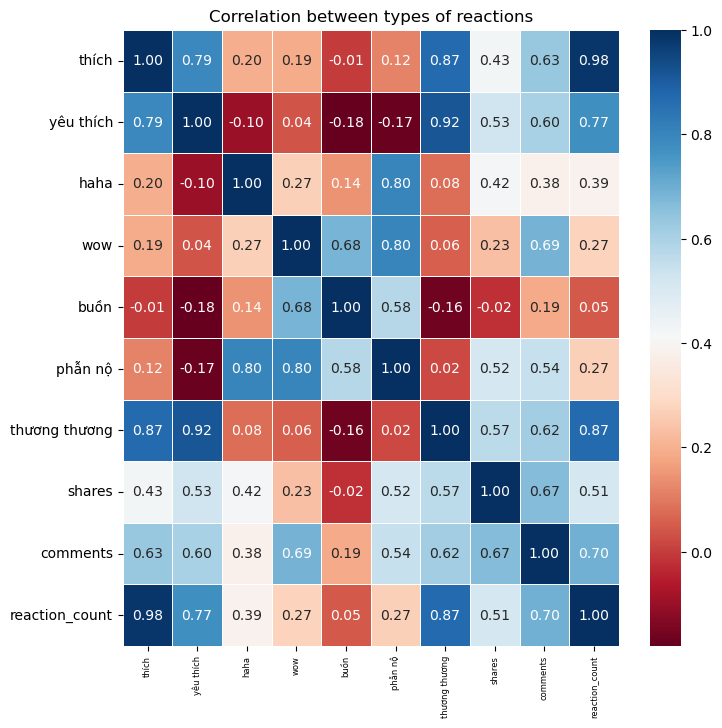

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f", linewidths=.5, ax=ax)

plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

#plt.colorbar()

plt.title("Correlation between types of reactions")

plt.show()


## Phan tich bai viet

In [22]:
# Tim cac bai viet chua mot tu khoa nao do
a = raw_df_with_reactions['post_text'].tolist()
res = []
for i in a:
    if "Chelsea" in i: res.append(i)
res

["[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOMEN (Vòng 7 Women's Super League)\n\nĐể đồng hành cùng đội nữ Chelsea vào hôm nay, các True Blues có thể tải ứng dụng The FA Player ở kho ứng dụng CH Play hoặc Apple Store tại địa chỉ:\n- https://apps.apple.com/us/app/the-fa-player/id1475496828?fbclid=IwAR2AUTzGbkh3icIMPXBZYG0OGsdmHU3bZDe7XV_v7qqlj_PAdPpxiUUWKW4\n- https://play.google.com/store/apps/details?id=com.thefa.player&fbclid=IwAR18kZucdGfoal1XLZlSG9PVId4hSDuTcLDc_CaT5UJW-wyxLN3ME8u2l3w&pli=1\n- Đồng thời, đăng ký một tài khoản (miễn phí).\n\nDo đội nam tạm nghỉ để nhưỡng chỗ cho loạt trận thi đấu của các đội tuyển quốc gia nên đội nữ Chelsea có dịp sử dụng sân Stamford Bridge (sức chứa hơn 40 ngàn người0 làm sân nhà để tiếp đón Liverpool thay vì sân Kingsmeadow (sức chứa chỉ gần 5 ngàn ngườii) vào hôm nay.\n\nTrước một Liverpool đang xếp thứ 5 trên bảng xếp hạng và thi đấu vô cùng khó lường (từng thắng Arsenal #2, hòa Tottenham #4, nhưng lại để thua Everton #10, hòa West Ham #9 mùa

## Reactions analysis

In [25]:
reactions.values()

dict_values([844, 59, 3, 1, 12])

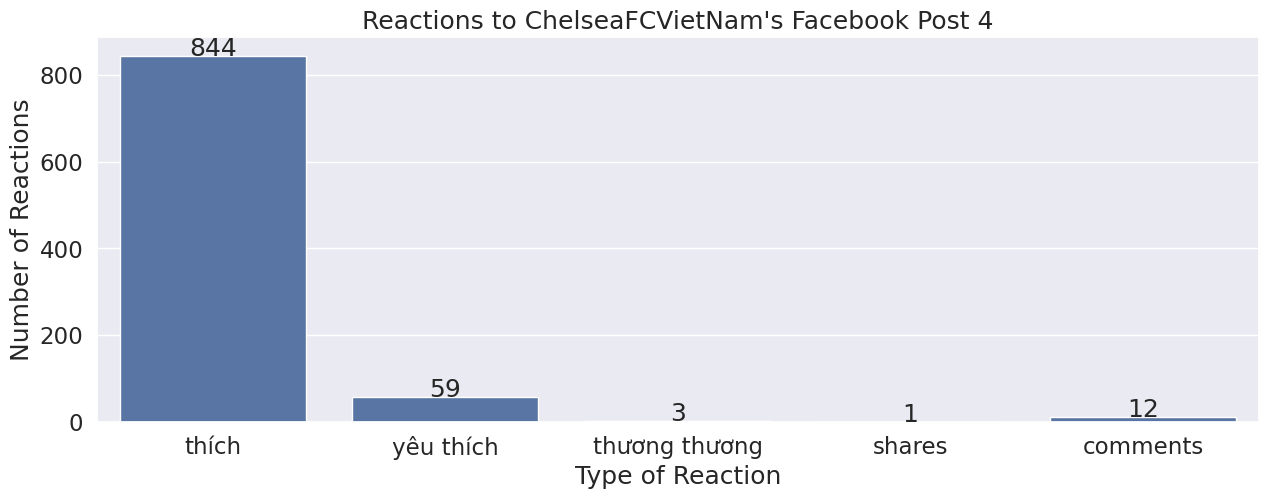

In [ ]:
# Hien thi gia tri tren moi thanh bar
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions in post 4
fig, axis = plt.subplots()
axis = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
addlabels(list(reactions.keys()), list(reactions.values()))
axis.set_title("Reactions to ChelseaFCVietNam's Facebook Post 4")
axis.set_ylabel("Number of Reactions")
axis.set_xlabel("Type of Reaction")
#plt.xticks(rotation=-45)
plt.show()

/tmp/ipykernel_3984/516659211.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], int(y[i]), ha = 'center')


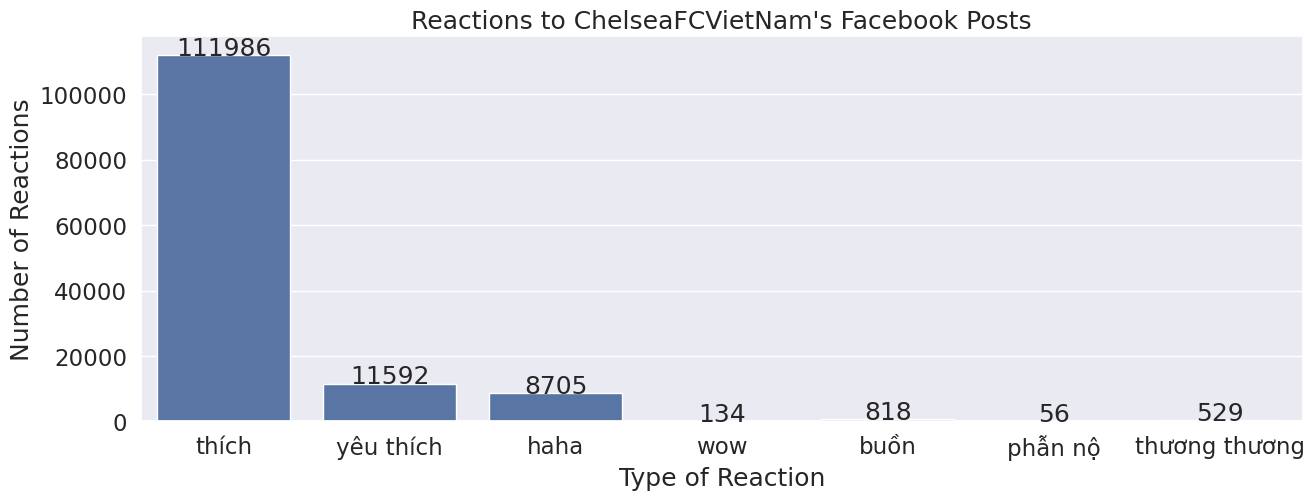

In [ ]:
# plot the reactions with full posts
fig, axis2 = plt.subplots()
axis2 = sns.plot(x=reactions_full.keys(), y=reactions_full.sum())
addlabels(reactions_full.keys(), reactions_full.sum())
axis2.set_title("Reactions to ChelseaFCVietNam's Facebook Posts")
axis2.set_ylabel("Number of Reactions")
axis2.set_xlabel("Type of Reaction")
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# O day danh gia so luong like 

## Read all posts

In [ ]:
'''
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text
'''
# Lấy tất cả các bài viết

text = "" 
for i in raw_df['post_text']:
  text=text+i+"\n"
# print(text)

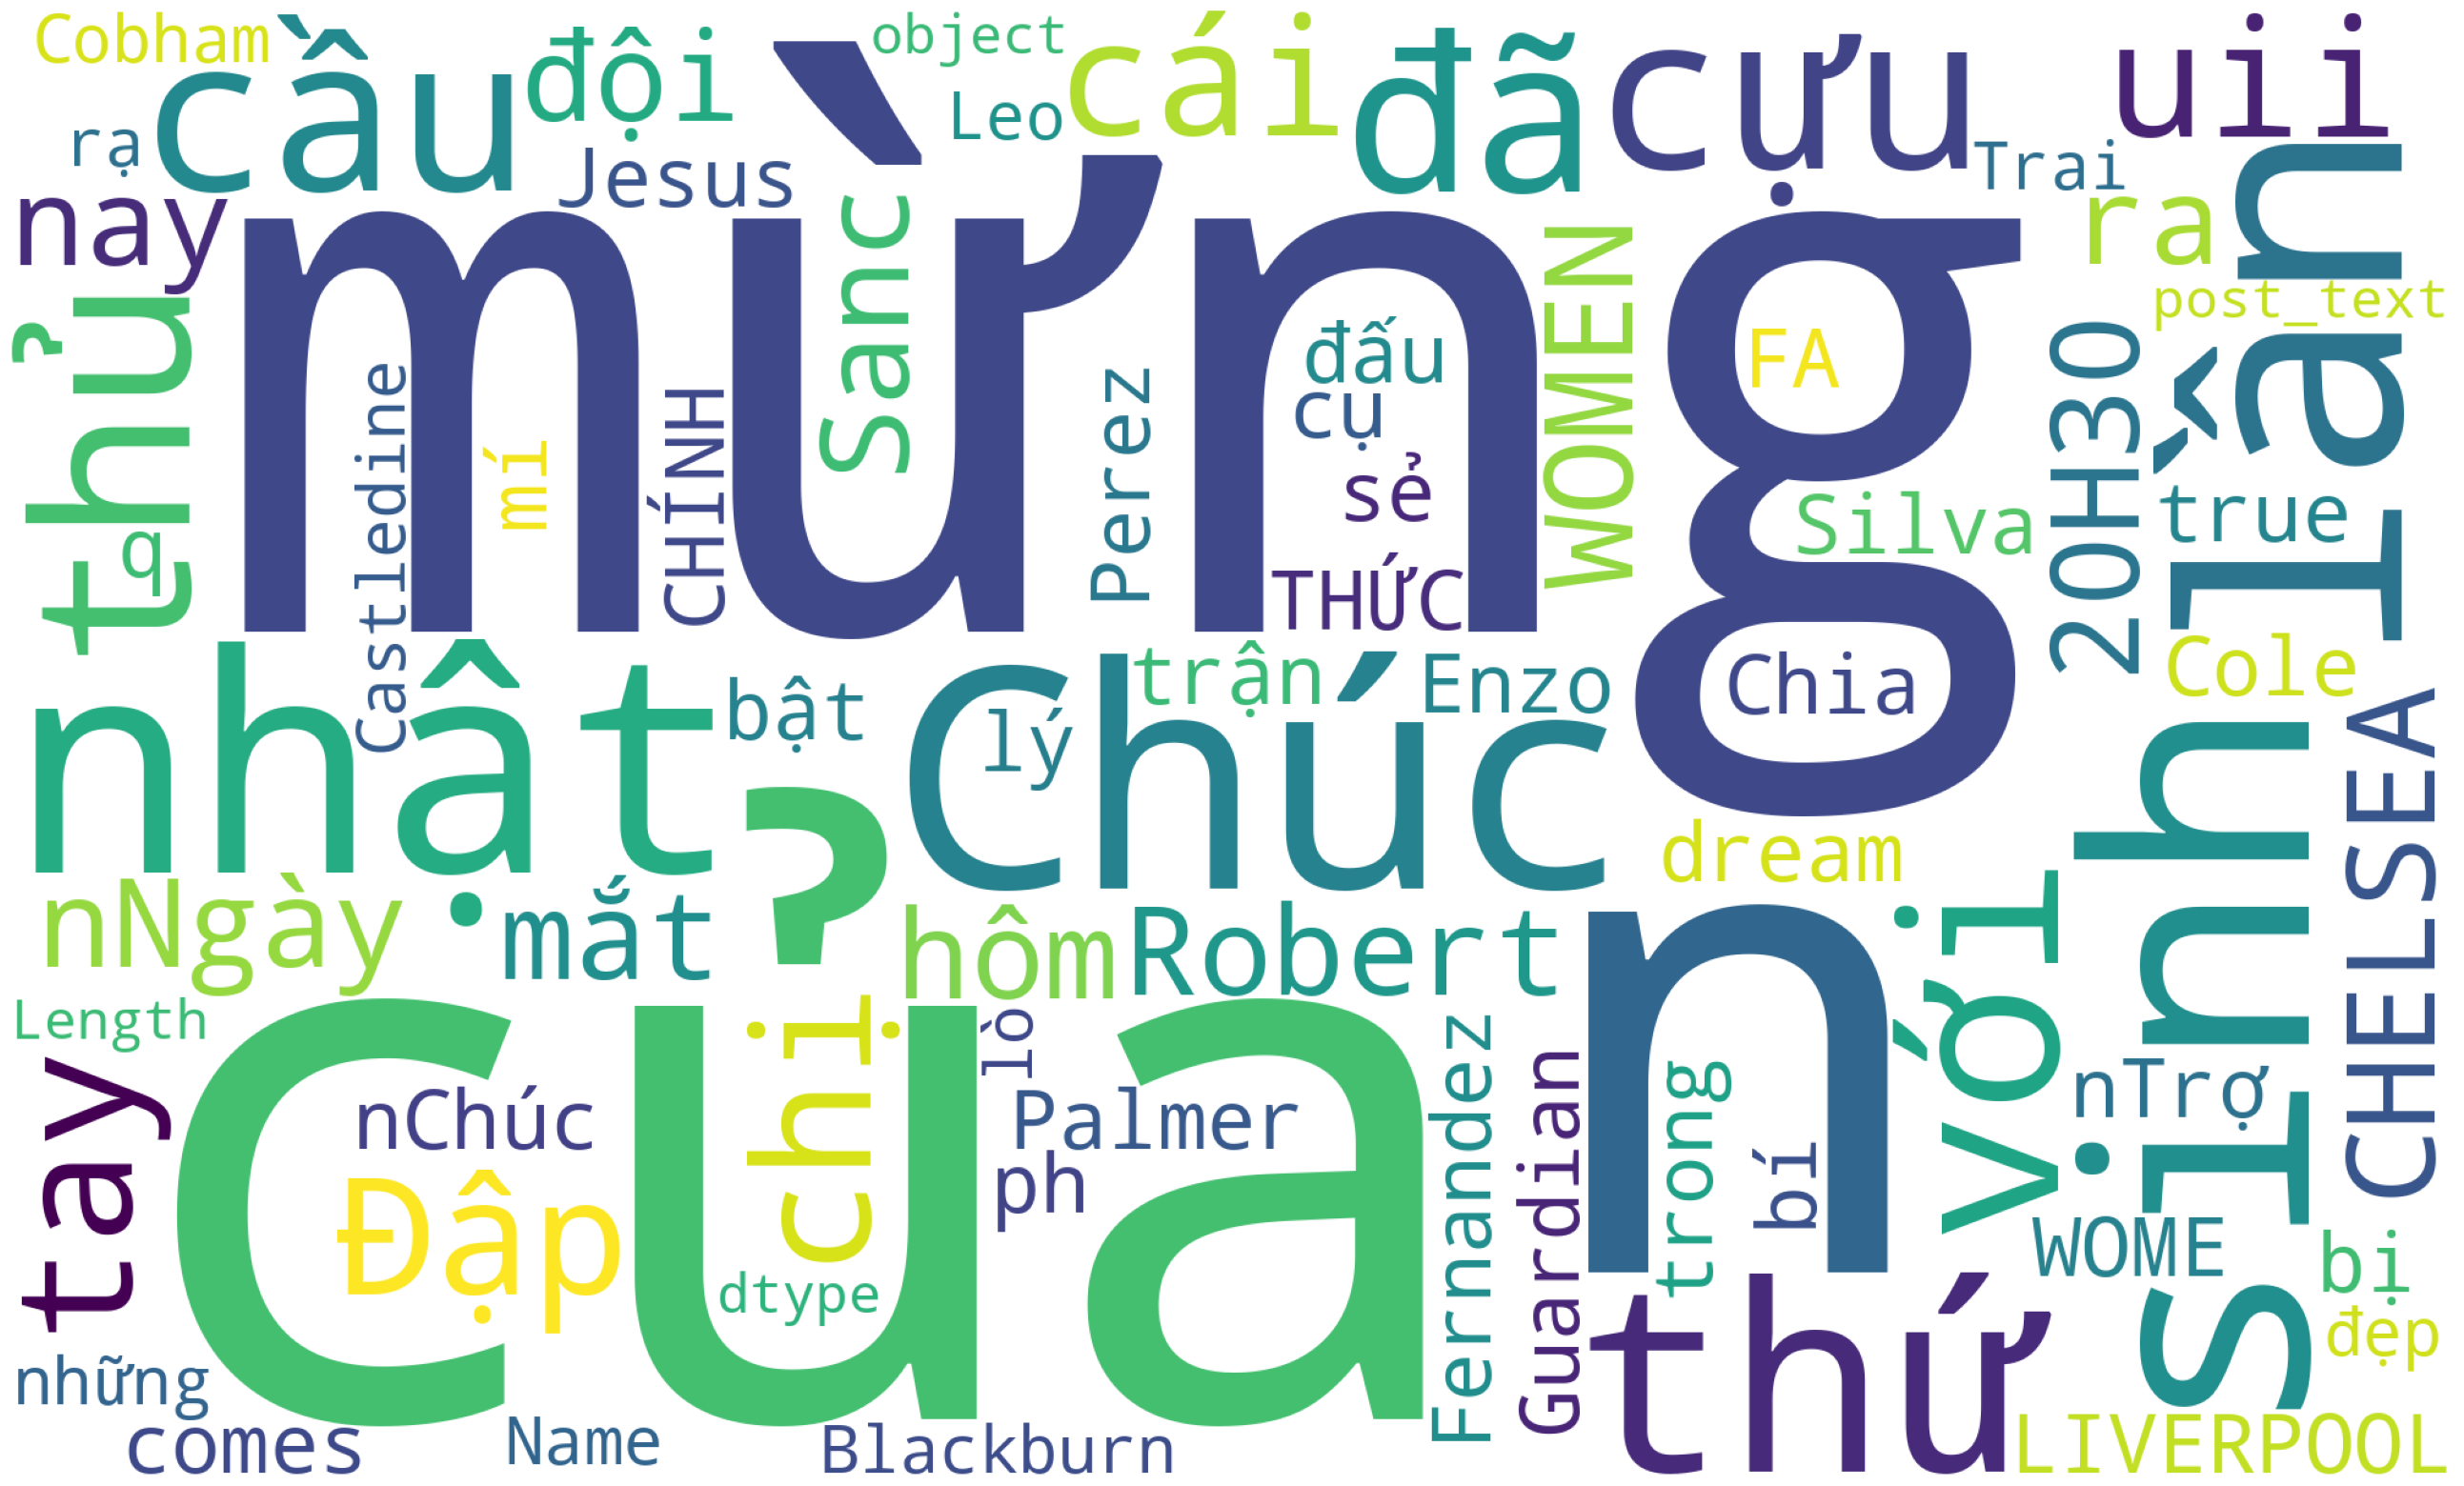

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Keyword thong ke trong thoi gian gan day

In [ ]:
text_fix = text
print(len(text))
text

69262


'“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội tuyển quốc gia \'đáng nhớ\' của Cole Palmer 😂\nChúc mừng sinh nhật lần thứ 26 của Robert Sanchez! 🎁️🎈🍰💙\n\n#HH vs #KK - CFCVN News Team\n[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOMEN (Vòng 7 Women\'s Super League)\n\nĐể đồng hành cùng đội nữ Chelsea vào hôm nay, các True Blues có thể tải ứng dụng The FA Player ở kho ứng dụng CH Play hoặc Apple Store tại địa chỉ:\n- https://apps.apple.com/us/app/the-fa-player/id1475496828?fbclid=IwAR2AUTzGbkh3icIMPXBZYG0OGsdmHU3bZDe7XV_v7qqlj_PAdPpxiUUWKW4\n- https://play.google.com/store/apps/details?id=com.thefa.player&fbclid=IwAR18kZucdGfoal1XLZlSG9PVId4hSDuTcLDc_CaT5UJW-wyxLN3ME8u2l3w&pli=1\n- Đồng thời, đăng ký một tài khoản (miễn phí).\n\nDo đội nam tạm nghỉ để nhưỡng chỗ cho loạt trận thi đấu của các đội tuyển quốc gia nên đội nữ Chelsea có dịp sử dụng sân Stamford Bridge (sức chứa hơn 40 ngàn người0 làm sân nhà để tiếp đón Liverpool thay vì sân Kingsmeadow (sức chứa chỉ gần 5 ngàn ngườii) vào hôm 

### Tim keyword

In [ ]:
# Xu li ngon ngu tu nhien
%pip install -U nltk
%pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

stop_words = ['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', 'biết mình', 'thường tại', 'trong mình', 'ô kìa', 'trước đây', 'vừa lúc', 'đâu cũng', 'thời điểm', 'từng ấy', 'ở được', 'cùng cực', 'khó nghĩ', 'vùng nước', 'quá tuổi', 'cật sức', 'thiếu điểm', 'dạ khách', 'chắc ăn', 'lần khác', 'tột cùng', 'tuần tự', 'những là', 'tự ý', 'bởi thế', 'thục mạng', 'trước ngày', 'tuốt tuồn tuột', 'trong ngoài', 'hiện nay', 'dù cho', 'thuộc bài', 'nữa khi', 'chịu chưa', 'không hay', 'thật sự', 'thà rằng', 'đặt mức', 'thậm từ', 'nhằm vào', 'dù sao', 'như không', 'bấy lâu nay', 'tuyệt nhiên', 'ngày đến', 'thích ý', 'thế sự', 'nghe chừng', 'đúng ngày', 'bộ thuộc', 'để giống', 'chưa dễ', 'ông nhỏ', 'thấy tháng', 'ba họ', 'vì chưng', 'càng hay', 'lấy có', 'tự lượng', 'thích tự', 'cơ mà', 'thật ra', 'thích cứ', 'ra ngôi', 'chuyển tự', 'ở đây', 'xon xón', 'dẫu rằng', 'ra tay', 'thường thôi', 'vì rằng', 'bất kì', 'xin gặp', 'thuần ái', 'lúc đi', 'đủ số', 'dễ thấy', 'nhờ đó', 'hơn là', 'thoạt nghe', 'ví phỏng', 'mà lại', 'nhanh lên', 'người khách', 'quả là', 'chưa dùng', 'cứ điểm', 'mỗi lần', 'lượng từ', 'nói riêng', 'khác nào', 'trời đất ơi', 'vị tất', 'bỏ mình', 'nói khó', 'quá mức', 'vèo vèo', 'từ tại', 'cuối cùng', 'phải cách', 'nhận nhau', 'ngày này', 'đáng lý', 'trước khi', 'sở dĩ', 'do vì', 'thường tính', 'đúng với', 'chung cho', 'mà không', 'phải biết', 'ái chà', 'hết nói', 'đâu đâu', 'chành chạnh', 'bỗng nhiên', 'có chăng là', 'ba tăng', 'trừ phi', 'ông tạo', 'như quả', 'nhất nhất', 'đưa tay', 'ngôi thứ', 'về phần', 'trệu trạo', 'sang năm', 'tấm bản', 'để phần', 'bỏ lại', 'từ đó', 'vừa mới', 'sì sì', 'thậm cấp', 'buổi sớm', 'bỏ mất', 'hay hay', 'gây giống', 'hay tin', 'nơi nơi', 'tại đây', 'hết của', 'dễ gì', 'tính cách', 'vâng vâng', 'chùn chũn', 'con nhà', 'gặp khó khăn', 'đều nhau', 'đại loại', 'nếu như', 'một khi', 'trong số', 'qua ngày', 'không ai', 'nói lại', 'riêng từng', 'nghĩ xa', 'lời nói', 'chứ không phải', 'lần tìm', 'trước tiên', 'cả người', 'trong vùng', 'tới gần', 'quả thế', 'thường khi', 'ông ấy', 'tháng ngày', 'xa xả', 'dễ dùng', 'ví bằng', 'chung quy', 'lấy làm', 'thấp thỏm', 'cây nước', 'cô ấy', 'đặc biệt', 'nào là', 'vào khoảng', 'kể như', 'tạo ra', 'dầu sao', 'về nước', 'nhón nhén', 'thích thuộc', 'sáng rõ', 'lại nữa', 'thực hiện', 'chưa từng', 'bấy nay', 'cấp số', 'đặt làm', 'nhớ ra', 'vung tàn tán', 'tắp lự', 'chung cuộc', 'từ khi', 'tuy có', 'có thể', 'như thế nào', 'ối dào', 'dễ như chơi', 'lên nước', 'lấy thế', 'lên số', 'cho tới', 'chứ còn', 'trả của', 'đến thế', 'gì gì', 'trước nay', 'thảo hèn', 'lúc đó', 'nhận việc', 'mang mang', 'không những', 'nào phải', 'trước đó', 'lớn nhỏ', 'thì thôi', 'tuổi cả', 'ra ý', 'quá tin', 'tuy rằng', 'dễ ngươi', 'con dạ', 'để không', 'cứ như', 'bên cạnh', 'tò te', 'chịu tốt', 'không kể', 'nức nở', 'lấy được', 'bỏ xa', 'lấy giống', 'tự tính', 'đến khi', 'vừa rồi', 'chết tiệt', 'sau cùng', 'cao thế', 'sao đang', 'qua chuyện', 'chỉ là', 'cả ăn', 'ba bản', 'ngồi bệt', 'làm dần dần', 'mang nặng', 'rồi đây', 'ăn sáng', 'cả nghĩ', 'cho đến khi', 'tình trạng', 'phần nào', 'tanh tanh', 'không gì', 'đưa cho', 'gì đó', 'sao bằng', 'ra gì', 'bước tới', 'tiếp tục', 'lấy cả', 'chung cục', 'xem ra', 'vậy mà', 'nhằm khi', 'trả ngay', 'có người', 'lên cao', 'phần việc', 'thuộc lại', 'hết cả', 'bất thình lình', 'trực tiếp', 'ấy là', 'ngay lập tức', 'ở vào', 'ai đó', 'cùng tuổi', 'dù rằng', 'vốn dĩ', 'bởi ai', 'thốt nhiên', 'từng phần', 'bằng người', 'số người', 'lại người', 'vài nhà', 'nhờ có', 'khi trước', 'hay sao', 'nữa rồi', 'bấy lâu', 'đồng thời', 'dở chừng', 'đánh giá', 'tìm bạn', 'tên họ', 'mất còn', 'khác nhau', 'dẫu mà', 'ngồi sau', 'chỉ tên', 'ngồi trệt', 'lên ngôi', 'dùng hết', 'vào đến', 'cũng vậy thôi', 'nước ăn', 'cho nên', 'phía bên', 'ăn cuộc', 'nói lên', 'biết đâu đấy', 'đáo để', 'giờ đến', 'đang thì', 'liên quan', 'nhiên hậu', 'nếu có', 'tha hồ chơi', 'ngõ hầu', 'từng nhà', 'lần sang', 'chú dẫn', 'đủ dùng', 'chắc hẳn', 'được lời', 'văng tê', 'ái dà', 'chớ không', 'chính điểm', 'dễ sợ', 'chao ôi', 'khi nên', 'bằng ấy', 'như chơi', 'ôi chao', 'họ xa', 'cật lực', 'cụ thể là', 'phải lời', 'chăng nữa', 'đầy năm', 'có số', 'ơi là', 'lúc khác', 'nghe không', 'con tính', 'đầu tiên', 'sáng thế', 'thốc tháo', 'thế ra', 'vậy thì', 'còn về', 'ngay cả', 'hết ý', 'xuất hiện', 'chưa chắc', 'mọi giờ', 'nhất mực', 'sao bản', 'sắp đặt', 'làm lòng', 'ăn ngồi', 'vậy ư', 'chứ gì', 'xử lý', 'vừa khi', 'nhất luật', 'trên bộ', 'bấy chầy', 'lại quả', 'tà tà', 'cơ hồ', 'nhỏ người', 'làm nên', 'bây bẩy', 'nếu vậy', 'người khác', 'tiếp đó', 'phía dưới', 'biết đâu chừng', 'dạ dài', 'còn nữa', 'có cơ', 'tôi con', 'quá lời', 'cách đều', 'để đến nỗi', 'thế nên', 'xa xa', 'hoàn toàn', 'mở mang', 'nhất tâm', 'vài người', 'phải khi', 'vô luận', 'thời gian tính', 'sáng ý', 'thanh không', 'một lúc', 'nói phải', 'chuyển đạt', 'đầy tuổi', 'tay quay', 'chung quy lại', 'chắc chắn', 'bao giờ', 'từ căn', 'thái quá', 'lấy vào', 'chứ lị', 'biết việc', 'giữ lấy', 'đưa tới', 'tiện thể', 'khi nào', 'như vậy', 'vừa qua', 'veo veo', 'cho biết', 'ngôi nhà', 'những ai', 'nên tránh', 'đã đủ', 'tuy vậy', 'nhất thiết', 'ăn chắc', 'không có gì', 'biết bao nhiêu', 'đều bước', 'giờ lâu', 'bỏ việc', 'đại phàm', 'lại ăn', 'qua đi', 'hoặc là', 'ngay bây giờ', 'làm thế nào', 'nhất định', 'nghe thấy', 'trước tuổi', 'mà vẫn', 'tăm tắp', 'về tay', 'ạ ơi', 'nhận được', 'phía trước', 'chỉ có', 'tránh ra', 'ra người', 'không đầy', 'nghe hiểu', 'phía trên', 'lần lần', 'tỏ vẻ', 'ba ngôi', 'phía bạn', 'trong khi', 'thì ra', 'đây này', 'bỏ riêng', 'lúc lâu', 'bản ý', 'bấy giờ', 'nghe được', 'khác khác', 'cùng tột', 'coi bộ', 'bán thế', 'ô hay', 'tên tự', 'qua khỏi', 'đã vậy', 'chính bản', 'ít nhiều', 'đưa xuống', 'bỗng chốc', 'quay lại', 'không bao lâu', 'không cùng', 'nào đó', 'vẫn thế', 'hay nói', 'còn như', 'dễ thường', 'ngày xửa', 'vâng ý', 'dùng đến', 'mọi khi', 'nhờ chuyển', 'ngay tức thì', 'khó thấy', 'ngay khi đến', 'nhận biết', 'ngay từ', 'ra đây', 'chưa có', 'cái đã', 'một cách', 'của ngọt', 'do vậy', 'đánh đùng', 'quan tâm', 'lên cơn', 'bất đồ', 'bỏ không', 'ráo trọi', 'làm lấy', 'đưa vào', 'sốt sột', 'mọi thứ', 'hay nhỉ', 'khó khăn', 'ồ ồ', 'sự thế', 'lấy xuống', 'ra chơi', 'cho tới khi', 'hầu hết', 'nói rõ', 'xuất kì bất ý', 'nhà làm', 'nhận ra', 'đưa ra', 'nữa là', 'nếu cần', 'thời gian', 'thế thôi', 'đâu phải', 'qua tay', 'đâu đó', 'oai oái', 'tại đó', 'mới hay', 'nhà ngươi', 'lúc đến', 'không thể', 'nhìn nhận', 'thật vậy', 'trong lúc', 'biết đâu', 'công nhiên', 'tuy thế', 'phải lại', 'vị trí', 'bỗng dưng', 'chưa kể', 'số loại', 'tránh tình trạng', 'của tin', 'họ gần', 'xin vâng', 'thế thế', 'đây đó', 'nhận làm', 'tập trung', 'nhớ bập bõm', 'chăn chắn', 'người nhận', 'nước lên', 'không phải không', 'dẫu sao', 'chung ái', 'tức thì', 'cụ thể như', 'bài bác', 'giống như', 'suýt nữa', 'từ ái', 'đặt ra', 'phỏng như', 'có đáng', 'nhận thấy', 'trả trước', 'hơn trước', 'tìm việc', 'mỗi một', 'nếu được', 'ở như', 'chứ không', 'những như', 'chí chết', 'bỏ nhỏ', 'chưa bao giờ', 'giống người', 'hết chuyện', 'dùng làm', 'ứ ừ', 'cùng ăn', 'nhất loạt', 'xa tắp', 'luôn cả', 'lần theo', 'không cần', 'lấy ráo', 'đến lời', 'phải cái', 'tha hồ ăn', 'sự việc', 'thực sự', 'điểm gặp', 'bỗng không', 'nhìn chung', 'làm được', 'ngày càng', 'không bán', 'điều gì', 'ít hơn', 'tính người', 'cuối điểm', 'dạ bán', 'chắc lòng', 'vào vùng', 'tuốt tuột', 'dễ khiến', 'đến thì', 'tiếp theo', 'ngăn ngắt', 'để lại', 'vâng dạ', 'cũng như', 'đã là', 'bất ngờ', 'hãy còn', 'nói ra', 'giảm thấp', 'nói thêm', 'ví thử', 'ít ra', 'chắc vào', 'nước cùng', 'bây chừ', 'chứ sao', 'bài cái', 'ừ ào', 'thuộc từ', 'từng cái', 'trước kia', 'anh ấy', 'ăn chịu', 'tự khi', 'những muốn', 'ngày qua', 'nhiệt liệt', 'à ơi', 'bằng không', 'nghĩ tới', 'có ngày', 'tìm hiểu', 'khó biết', 'bất chợt', 'người hỏi', 'toé khói', 'làm ngay', 'giờ này', 'thương ôi', 'vì vậy', 'có phải', 'như thể', 'đến cùng cực', 'như thế', 'xiết bao', 'bất tử', 'căn cái', 'xềnh xệch', 'như trước', 'làm sao', 'ít thấy', 'dài ra', 'cao xa', 'có thế', 'sa sả', 'quá trình', 'phải giờ', 'tự cao', 'thường hay', 'nhận họ', 'yêu cầu', 'làm đúng', 'là nhiều', 'vừa vừa', 'nước bài', 'khá tốt', 'đại để', 'tấm các', 'cái họ', 'cô tăng', 'ví dù', 'sáng ngày', 'vào gặp', 'ngày giờ', 'một vài', 'cần cấp', 'như tuồng', 'khác xa', 'dù dì', 'ngày xưa', 'điểm đầu tiên', 'lên mạnh', 'bây nhiêu', 'thường sự', 'có nhiều', 'ô kê', 'kể cả', 'đến nỗi', 'đều đều', 'cứ việc', 'phải chi', 'hay làm', 'khác gì', 'thường xuất hiện', 'bởi thế cho nên', 'ngoài ra', 'ý da', 'thế thì', 'cho đến nỗi', 'biết chắc', 'gây thêm', 'từng giờ', 'vì thế', 'nhìn lại', 'nghe rõ', 'bởi đâu', 'khoảng không', 'vấn đề quan trọng', 'tức tốc', 'tính căn', 'ngày nọ', 'đáng số', 'sẽ biết', 'cơ hội', 'trong đó', 'ắt hẳn', 'thanh điểm', 'nào đâu', 'điểm chính', 'khác thường', 'đưa tin', 'phương chi', 'úi dào', 'quả thật', 'nói xa', 'chung chung', 'vô hình trung', 'ăn người', 'vùng lên', 'nhung nhăng', 'thường bị', 'thuộc cách', 'biết thế', 'bị vì', 'thế lại', 'cơ dẫn', 'nhân dịp', 'bỏ bà', 'lấy lý do', 'lâu ngày', 'phù hợp', 'đáng lí', 'mọi nơi', 'cho nhau', 'có điều kiện', 'bên có', 'chớ như', 'ngày nào', 'nhất quyết', 'phải chăng', 'có nhà', 'đến hay', 'thấp cơ', 'qua lần', 'bộ điều', 'mà cả', 'có chăng', 'cao thấp', 'nói với', 'làm vì', 'giá trị', 'nên người', 'ngoài xa', 'thêm vào', 'lâu các', 'không để', 'thế đó', 'khỏi nói', 'cho chắc', 'cả thảy', 'làm gì', 'buổi mới', 'từ tính', 'nhớ lại', 'một ít', 'bởi vậy', 'giữ ý', 'cùng với', 'trực tiếp làm', 'tới mức', 'hay đâu', 'chúng tôi', 'chú mày', 'nghe như', 'chọn ra', 'âu là', 'bây giờ', 'đến ngày', 'tự vì', 'là cùng', 'nhìn xuống', 'đó đây', 'xăm xăm', 'làm riêng', 'đến nay', 'tăng chúng', 'tháng tháng', 'cái đó', 'ngày ấy', 'lượng cả', 'bao nả', 'có họ', 'mở ra', 'thoạt nhiên', 'xăm xúi', 'lúc nào', 'nói qua', 'đáng lẽ', 'ít nhất', 'vài tên', 'nhỡ ra', 'bập bõm', 'do đó', 'không còn', 'ít có', 'như sau', 'thanh điều kiện', 'hết ráo', 'số là', 'lần nào', 'hay là', 'hỏi lại', 'thường đến', 'tốt mối', 'rõ thật', 'thứ đến', 'bởi nhưng', 'đưa đến', 'ít khi', 'thật thà', 'thực tế', 'quá tay', 'chú mình', 'ừ ừ', 'việc gì', 'không tính', 'bởi tại', 'tạo điều kiện', 'có ai', 'chung nhau', 'tạo ý', 'gần bên', 'làm lại', 'rất lâu', 'bỗng nhưng', 'có vẻ', 'ngày tháng', 'có dễ', 'kể từ', 'nhà việc', 'phần nhiều', 'đến xem', 'sau đây', 'đủ điều', 'nước nặng', 'khó nghe', 'tênh tênh', 'dễ ăn', 'cao số', 'phải người', 'đã lâu', 'a lô', 'có ăn', 'bởi chưng', 'bản riêng', 'không bao giờ', 'vượt khỏi', 'được tin', 'thì phải', 'đúng tuổi', 'từ từ', 'lời chú', 'càng càng', 'nghe đâu như', 'bỗng đâu', 'nói toẹt', 'sau hết', 'để được', 'như trên', 'hay không', 'cô quả', 'luôn tay', 'thật chắc', 'theo tin', 'đơn vị', 'là là', 'quá đáng', 'rõ là', 'nhà tôi', 'ít thôi', 'chú khách', 'ngay thật', 'nói đủ', 'phải tay', 'lại bộ', 'cá nhân', 'tất cả', 'nhanh tay', 'nếu không', 'hơn cả', 'có khi', 'những khi', 'không phải', 'phỏng tính', 'duy có', 'thay đổi tình trạng', 'hỏi xem', 'có chứ', 'lúc trước', 'không ngoài', 'quan trọng vấn đề', 'khó làm', 'ngay lúc này', 'cho hay', 'tên chính', 'phần sau', 'bằng như', 'tông tốc', 'chịu lời', 'lấy lại', 'cách bức', 'số phần', 'lấy số', 'rồi sao', 'ba cùng', 'vả lại', 'cơ chỉ', 'tốt ngày', 'tự tạo', 'rút cục', 'ở năm', 'như ai', 'giá trị thực tế', 'tạo cơ hội', 'mọi việc', 'gây cho', 'bước khỏi', 'thà là', 'cảm thấy', 'rồi ra', 'chứ ai', 'xem lại', 'từng đơn vị', 'chui cha', 'lấy để', 'được cái', 'chầm chập', 'tất thảy', 'thi thoảng', 'với lại', 'chẳng lẽ', 'thỉnh thoảng', 'tù tì', 'lại cái', 'dễ nghe', 'có ý', 'cả tin', 'lại nói', 'thêm chuyện', 'chúng ta', 'ngồi không', 'bỗng thấy', 'phải không', 'thế mà', 'cùng nhau', 'cũng nên', 'phần lớn', 'coi mòi', 'trước nhất', 'dễ đâu', 'đến giờ', 'để lòng', 'cả thể', 'có được', 'ăn quá', 'tuy là', 'từ thế', 'so với', 'chớ gì', 'nhà chung', 'nhớ lấy', 'bội phần', 'đành đạch', 'đến cùng', 'làm cho', 'tuy đã', 'cho tin', 'gặp phải', 'cho đến', 'thực hiện đúng', 'tới thì', 'ăn hết', 'xăm xắm', 'chùn chùn', 'thật lực', 'làm mất', 'chung qui', 'ớ này', 'bay biến', 'bập bà bập bõm', 'tránh xa', 'ở lại', 'song le', 'từ ấy', 'một số', 'tất tật', 'rồi nữa', 'được nước', 'chợt nhìn', 'nhất là', 'cả nhà', 'ngay tức khắc', 'ừ thì', 'ngay lúc', 'lần trước', 'cụ thể', 'có đâu', 'gần đây', 'cực lực', 'sau cuối', 'đến nơi', 'đảm bảo', 'lâu nay', 'từ nay', 'lên xuống', 'rồi thì', 'lớn lên', 'biết bao', 'buổi làm', 'mà thôi', 'mỗi người', 'mọi người', 'tại tôi', 'tất tần tật', 'thế à', 'bởi sao', 'phè phè', 'ngày cấp', 'thế nào', 'là vì', 'lại đây', 'đến cả', 'vô vàn', 'sau này', 'ăn trên', 'quay đi', 'tháng năm', 'chưa tính', 'tốt hơn', 'mới rồi', 'hỏi xin', 'khó tránh', 'tự ăn', 'tốt bạn', 'làm tin', 'thế chuẩn bị', 'chính là', 'cô mình', 'ít biết', 'lần này', 'đặt mình', 'trả lại', 'tại vì', 'quá bán', 'đến đâu', 'như là', 'đúng ra', 'quay số', 'từ điều', 'chợt nghe', 'bấy chừ', 'bước đi', 'còn thời gian', 'cả ngày', 'chọn bên', 'lại thôi', 'dùng cho', 'nhằm lúc', 'người người', 'vậy nên', 'phía sau', 'bất cứ', 'thốt thôi', 'chớ chi', 'mỗi ngày', 'ào ào', 'không được', 'thì giờ', 'gần như', 'ơ hay', 'rồi sau', 'mọi lúc', 'nếu mà', 'xuất kỳ bất ý', 'sang tay', 'tin thêm', 'cơ chừng', 'a ha', 'đối với', 'gây ra', 'cách nhau', 'tuốt luốt', 'vung tán tàn', 'vượt quá', 'tính phỏng', 'từng thời gian', 'luôn luôn', 'chúng ông', 'thế thường', 'nói tốt', 'lại còn', 'ren rén', 'lại làm', 'biết chừng nào', 'bỏ cha', 'cái gì', 'rồi tay', 'xa cách', 'làm bằng', 'ngọn nguồn', 'thanh thanh', 'ối giời ơi', 'quá thì', 'xảy ra', 'sau chót', 'trong ấy', 'tại lòng', 'thanh chuyển', 'trước sau', 'vạn nhất', 'tối ư', 'chỉ chính', 'tựu trung', 'chẳng phải', 'xem số', 'thường thường', 'hay biết', 'nào cũng', 'cho ăn', 'có điều', 'đưa về', 'đặt để', 'với nhau', 'trước hết', 'rằng là', 'thay đổi', 'theo bước', 'tốt bộ', 'bằng vào', 'bán cấp', 'lấy thêm', 'đến bao giờ', 'cao sang', 'riu ríu', 'vào lúc', 'thật tốt', 'khi khác', 'cho về', 'vài ba', 'nghe nhìn', 'thanh tính', 'áng như', 'chơi họ', 'hỗ trợ', 'vâng chịu', 'xa gần', 'bằng nấy', 'chẳng những', 'bởi vì', 'bỏ quá', 'lên đến', 'thứ bản', 'đến lúc', 'ít nữa', 'phải như', 'thì là', 'giảm chính', 'gần đến', 'nên chi', 'nghe tin', 'cao lâu', 'thế là', 'lấy sau', 'gần ngày', 'tìm cách', 'phỏng theo', 'ăn riêng', 'ăn về', 'thành ra', 'đáng kể', 'chăng chắc', 'các cậu', 'thình lình', 'tuy nhiên', 'rồi xem', 'bản thân', 'phía trong', 'bà ấy', 'nên chăng', 'cùng chung', 'nhìn thấy', 'kể tới', 'đến điều', 'dữ cách', 'cần gì', 'sao vậy', 'thật là', 'có chuyện', 'giờ đi', 'bấy nhiêu', 'nói thật', 'xa nhà', 'bắt đầu', 'sao cho', 'chính thị', 'ở trên', 'không nhận', 'nên làm', 'dần dần', 'về sau', 'mang lại', 'lần sau', 'nghĩ ra', 'khoảng cách', 'buổi ngày', 'đây rồi', 'ít quá', 'là thế nào', 'thực ra', 'một cơn', 'nhằm để', 'ngày ngày', 'biết mấy', 'nếu thế', 'nghe đâu', 'làm tôi', 'đặt trước', 'trếu tráo', 'tăng thêm', 'cũng thế', 'làm như', 'phăn phắt', 'than ôi', 'mọi sự', 'nhất sinh', 'chuẩn bị', 'ráo nước', 'tắp tắp', 'dạ con', 'số cụ thể', 'ăn tay', 'ông ổng', 'ra điều', 'nước quả', 'ngay khi', 'năm tháng', 'bất giác', 'nhưng mà', 'dài lời', 'nói ý', 'là ít', 'chị bộ', 'đã hay', 'cũng vậy', 'ở nhờ', 'nghe trực tiếp', 'ngoài này', 'bất quá chỉ', 'làm tại', 'thảo nào', 'em em', 'cho đang', 'quá ư', 'rốt cục', 'nhất đán', 'ra bài', 'trở thành', 'nhất tề', 'răng răng', 'thành thử', 'cổ lai', 'thật quả', 'ắt là', 'loại từ', 'thốt nói', 'xa tanh', 'chứ lại', 'nói chung', 'làm theo', 'nhân tiện', 'không chỉ', 'lại giống', 'không dùng', 'tại sao', 'cả nghe', 'quay bước', 'bất kỳ', 'phỏng nước', 'không biết', 'thiếu gì', 'á à', 'không có', 'xoành xoạch', 'đâu có', 'biết được', 'rốt cuộc', 'qua thì', 'bên bị', 'lúc sáng', 'bắt đầu từ', 'khó nói', 'như ý', 'đâu nào', 'thời gian sử dụng', 'nặng mình', 'nghe nói', 'ra lời', 'chắc dạ', 'quá nhiều', 'sau sau', 'tạo nên', 'chia sẻ', 'thanh ba', 'ngày rày', 'ra vào', 'số cho biết', 'ô hô', 'thêm giờ', 'theo như', 'con con', 'ít lâu', 'điều kiện', 'vậy ra', 'ý hoặc', 'những lúc', 'ở đó', 'như nhau', 'cao răng', 'vậy là', 'chịu ăn', 'bằng nhau', 'rón rén', 'để mà', 'à này', 'sau nữa', 'làm ra', 'tuổi tôi', 'nói đến', 'nói trước', 'bị chú', 'hiện tại', 'úi chà', 'đâu như', 'cách không', 'hết rồi', 'khó mở', 'chết nỗi', 'ừ nhé', 'đến tuổi', 'đại nhân', 'không cứ', 'mở nước', 'ra sao', 'lý do', 'thôi việc', 'quá bộ', 'bán dạ', 'nhược bằng', 'chị ấy', 'bất nhược', 'trên dưới', 'chính giữa', 'cũng được', 'để cho', 'thậm chí', 'cái ấy', 'ắt phải', 'bỏ mẹ', 'dần dà', 'khi không', 'nhiều ít', 'nước đến', 'số thiếu', 'tít mù', 'cả năm', 'chưa cần', 'vì sao', 'tăng thế', 'nghĩ đến', 'tìm ra', 'quả vậy', 'qua lại', 'biết trước', 'đầy phè', 'ra lại', 'nghiễm nhiên', 'dạ dạ', 'ba ba', 'giống nhau', 'tên cái', 'bỏ cuộc', 'đủ điểm', 'ôi thôi', 'dưới nước', 'nhất thì', 'tấn tới', 'lâu lâu', 'thấp xuống', 'như thường', 'nói bông', 'chớ kể', 'giảm thế', 'bất luận', 'nghe lại', 'quá giờ', 'làm tắp lự', 'bằng được', 'nào hay', 'cấp trực tiếp', 'bao lâu', 'vả chăng', 'từ giờ', 'nghe ra', 'tin vào', 'bỏ ra', 'bài bỏ', 'nhờ nhờ', 'mang về', 'nặng căn', 'tính từ', 'hơn nữa', 'ai ai', 'dễ sử dụng', 'mới đây', 'vấn đề', 'chúng mình', 'gần xa', 'vô kể', 'nặng về', 'ra bộ', 'tốc tả', 'tăng giảm', 'không khỏi', 'người mình', 'thường số', 'cao ráo', 'nghĩ lại', 'cu cậu', 'bản bộ', 'sớm ngày', 'ắt thật', 'cho thấy', 'bằng cứ', 'hơn hết', 'lúc ấy', 'cho rồi', 'cóc khô', 'nhà ngoài', 'đến gần', 'nhà khó']


In [ ]:
stop_words1={'nhưng', 'trả', 'nhóm', 'vậy', 'liên_kết', 'thẩy', 'cấp', 'vừa', 'ơ', 'trước', 'mọi', 'nhận', 'lời', 'và', 'amen', 'chậc', 'cách', 'trên', 'bài', 'ngôi', 'trệt', 'nói', 'hai', 'buổi', 'thấp', 'loài', 'tạo', 'thốc', 'vụt', 'không', 'thường', 'chính', 'cùng', 'điểm', 'bệt', 'nếu', 'ái', 'oái', 'bản', 'giảm', 'bển', 'giữa', 'bông', 'sắp', 'giờ', 'ngay', 'cái', 'khó', 'thế', 'bỗng', 'tránh', 'rõ', 'thuần', 'phía', 'bên', 'hoa', 'chú', 'tới', 'bước', 'bà', 'chỉ', 'ờ', 'chung', 'nghĩ', 'tỉnh', 'tin', 'rằng', 'ngày', 'căn', 'gần', 'ngoải', 'sáng', 'nóc', 'mối', 'được', 'càng', 'rồi', 'chị', 'cuộc', 'nặng', 'con', 'sang', 'bức', 'nguồn', 'giữ', 'loại', 'điều', 'nhất', 'phót', 'bớ', 'thoắt', 'ngoài', 'cần', 'từng', 'lúc', 'bằng', 'vẫn', 'cơ', 'này', 'ồ', 'thực_vật', 'tấn', 'ơi', 'đúng', 'dạ', 'dễ', 'bị', 'vài', 'bác', 'ủa', 'thỏm', 'cũng', 'nền', 'nhằm', 'ngồi', 'xuống', 'ấy', 'mợ', 'nó', 'hãy', 'phè', 'đã', 'tanh', 'ớ', 'gây', 'do', 'trỏng', 'dân_số', 'chăng', 'dẫn', 'khỏi', 'dì', 'xoét', 'một', 'đều', 'dành', 'lớn', 'ư', 'lại', 'rất', 'cơn', 'để', 'sất', 'nước', 'lên', 'khác', 'anh', 'làm', 'đang', 'phỏng', 'nhé', 'như', 'nhau', 'tên', 'xuể', 'mất', 'đầu_tiên', 'còn', 'thuộc', 'qua', 'của', 'cứ', 'tôi', 'thộc', 'mô_tả', 'chọn', 'có', 'duy', 'mà', 'đưa', 'hỏi', 'chiếc', 'thì', 'mang', 'mạnh', 'nhìn', 'nhỉ', 'thím', 'trong', 'ắt', 'tắp', 'bán', 'thật', 'xệp', 'ở', 'dùng', 'riệt', 'đây', 'thêm', 'ừ', 'hơn', 'xoẳn', 'toẹt', 'răng', 'tuổi', 'à', 'khá', 'sì', 'từ', 'năm', 'miêu_tả', 'vào', 'quận', 'chủn', 'các', 'xem', 'tay', 'thứ', 'tốt', 'phốc', 'mỗi', 'cho', 'chuyện', 'vở', 'cả', 'riêng', 'thửa', 'việc', 'béng', 'thốt', 'thanh', 'người', 'đủ', 'dưới', 'vùng', 'đầy', 'phóc', 'gặp', 'vì', 'ai', 'ngọn', 'chúng', 'tênh', 'thấy', 'cậu', 'cuốn', 'tọt', 'vượt', 'cao', 'đặt', 'biết', 'mở', 'sẽ', 'rích', 'khi', 'cây', 'sự', 'phứt', 'phắt', 'số', 'xa', 'thoạt', 'khiến', 'introduction', 'dài', 'hiểu', 'veo', 'ạ', 'rén', 'lòng', 'rứa', 'mức', 'với', 'cuối', 'sớm', 'tham_khảo', 'úi', 'nấy', 'nên', 'ráo', 'ử', 'bộ', 'gì', 'toà', 'gồm', 'ngươi', 'tại', 'nhỏ', 'trển', 'tìm', 'sau', 'dữ', 'nhớ', 'nghe', 'chợt', 'thà', 'chuyển', 'em', 'về', 'đó', 'vèo', 'mới', 'khách', 'cha', 'bỏ', 'đạt', 'nhà', 'á', 'so', 'chắc', 'thiếu', 'chịu', 'xoẹt', 'đâu', 'thậm', 'ba', 'lâu', 'bèn', 'dù', 'đến', 'nọ', 'họ', 'nớ', 'nhờ', 'theo', 'nữa', 'hoặc', 'chớ', 'bấy', 'nào', 'áng', 'nay', 'mình', 'alô', 'nơi', 'lấy', 'bạn', 'xin', 'ông', 'chơi', 'tớ', 'là', 'lượng', 'ăn', 'quả', 'thích', 'phải', 'choa', 'ý', 'tuy', 'khoảng', 'ra', 'hết', 'kể', 'chỉn', 'giống', 'tột', 'vâng', 'dào', 'đáng', 'thôi', 'ổng', 'nghỉm', 'tăng', 'muốn', 'cô', 'tính', 'bởi', 'ngọt', 'lần', 'tháng', 'chứ', 'luôn', 'hay', 'những', 'thể_loại', 'tấm', 'phần', 'nhanh', 'nghen', 'chưa', 'sao', 'quay', 'dẫu', 'thếch', 'phụt', 'ào', 'ít', 'pho', 'rày', 'khoa_học', 'nhiều', 'tự', 'suýt', 'chú_thích', 'quá','diễn','-'}
count=0
for i in stop_words1 :
  print(i, end=' , ')
  count+=1
  if count %10==0 : print()

lúc , thứ , xuể , ngày , - , thuần , giảm , toà , bán , thể_loại , 
bèn , căn , sẽ , ơ , vừa , chiếc , xoẳn , ông , ào , chớ , 
ắt , cần , từ , răng , chậc , chú , điều , nay , nhà , riệt , 
chỉ , mức , dạ , thấy , nền , quận , lâu , nhận , sáng , khách , 
bông , phụt , này , chợt , vở , thấp , dẫu , hoặc , ủa , cô , 
hãy , đặt , mô_tả , nghĩ , đủ , xuống , diễn , phỏng , quả , tanh , 
ồ , bác , miêu_tả , ớ , thật , ngọt , xem , nói , điểm , con , 
sang , việc , sất , thửa , mọi , buổi , trỏng , dì , bởi , hai , 
của , cây , ngọn , đâu , lại , nào , luôn , hoa , thường , mạnh , 
tìm , theo , dân_số , ngoải , rén , ba , lên , ạ , trước , biết , 
giống , nghen , tênh , rất , mợ , các , ổng , chị , chắc , cả , 
tuy , xa , họ , phải , tới , ngồi , áng , mở , tham_khảo , lòng , 
nhiều , ái , ra , số , cái , veo , ngay , nếu , nó , vào , 
thêm , tọt , giữ , ăn , dễ , bển , với , vụt , khá , trên , 
chọn , để , sắp , tạo , bạn , nhằm , nước , đó , chưa , về , 
đúng , gì , tại , thậm , phót , 

In [ ]:
for i in stop_words:
  text = text.replace(i,"");

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dungtk2004/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# tìm số từ xuất hiện trong tài liệu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)


#tìm số câu xuất hiện trong tài liệu
from nltk.tokenize import sent_tokenize
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

13567
458


In [ ]:

# Tính TF cho mỗi từ
tf_score = {} #Dict
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words1:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)



# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
print(tf_score)


{'“Đập': 1, 'uii”': 1, '🙄': 1, 'Ngày': 1, 'mắt': 3, 'đội': 74, 'tuyển': 22, 'quốc': 3, 'gia': 15, "'đáng": 1, "nhớ'": 1, 'Cole': 14, 'Palmer': 14, '😂': 1, 'Chúc': 34, 'mừng': 40, 'sinh': 29, 'nhật': 34, '26': 3, 'Robert': 1, 'Sanchez!': 1, '🎁️🎈🍰💙': 26, '#HH': 27, 'vs': 36, '#KK': 15, 'CFCVN': 100, 'News': 96, 'Team': 96, '[20H30': 1, 'hôm': 29, 'nay]': 3, 'CHELSEA': 24, 'WOMEN': 10, 'LIVERPOOL': 1, '(Vòng': 44, '7': 9, "Women's": 59, 'Super': 31, 'League)': 44, 'Để': 10, 'đồng': 17, 'hành': 11, 'nữ': 13, 'Chelsea': 182, 'nay,': 22, 'True': 14, 'Blues': 36, 'thể': 61, 'tải': 9, 'ứng': 21, 'dụng': 25, 'The': 51, 'FA': 37, 'Player': 9, 'kho': 9, 'CH': 9, 'Play': 9, 'Apple': 9, 'Store': 9, 'địa': 5, 'chỉ:': 4, 'https://appsapplecom/us/app/the-fa-player/id1475496828?fbclid=IwAR2AUTzGbkh3icIMPXBZYG0OGsdmHU3bZDe7XV_v7qqlj_PAdPpxiUUWKW4': 3, 'https://playgooglecom/store/apps/details?id=comthefaplayer&fbclid=IwAR18kZucdGfoal1XLZlSG9PVId4hSDuTcLDc_CaT5UJW-wyxLN3ME8u2l3w&pli=1': 3, 'Đồng': 3, 'th

In [ ]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)
     

{'“Đập': 6.126869184114185, 'tay': 0.4743800038455345, 'cái': 0.8538696255504382, 'đã': 1.381937055750935, 'chị': 1.708028576317587, 'uii”': 6.126869184114185, '🙄': 6.126869184114185, 'Ngày': 6.126869184114185, 'ra': 0.32173421519769646, 'mắt': 1.4824782849728124, 'đội': 1.1923952509834932, 'tuyển': 1.2985554468118838, 'quốc': 2.156577270562063, 'gia': 0.2106671215067498, "'đáng": 6.126869184114185, "nhớ'": 6.126869184114185, 'của': 0.9065133590358602, 'Cole': 0.7152231322591451, 'Palmer': 1.594269690960929, '😂': 6.126869184114185, 'Chúc': 1.541901705443613, 'mừng': 1.4729088339566614, 'sinh': 0.3247508087371221, 'nhật': 0.8038592049757769, 'lần': 1.045464819129722, 'thứ': 1.214214298378133, '26': 2.3656690684206225, 'Robert': 6.126869184114185, 'Sanchez!': 6.126869184114185, '🎁️🎈🍰💙': 2.794664673938981, '#HH': 1.8093810705778746, 'vs': 0.5934796953866647, '#KK': 2.0664261735677654, '-': 1.0964312627217494, 'CFCVN': 1.5317493339795951, 'News': 1.5625209926463486, 'Team': 1.0392728488818

In [ ]:

# Lay N tu quan trong nhat cua document
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{'CFCVN': 0.01129025822937713,
 'News': 0.011056387948260445,
 "Women's": 0.010602299260707208,
 'Chelsea': 0.010020555256461857,
 '(Vòng': 0.007748564966208883,
 '#KTBFFH': 0.007425018107055704,
 'Team': 0.007353887631211976,
 'mùa': 0.007227888438873802,
 'đấu': 0.006874783226808884,
 'League)': 0.006591809785748634}